In [1]:
import pandas as pd
import numpy as np

In [3]:
# read csv
df_excel = pd.read_csv('StudentsPerformance.csv')
df_excel

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Sum, Average, Max, Min, Count

COlumn

In [5]:
# first look
df_excel.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
# calculate specific columns

df_excel['math score'].sum()
# df_excel['math score'].mean()
# df_excel['math score'].max()
# df_excel['math score'].min()
# df_excel['math score'].count()

66089

ROWS

In [7]:
df_excel['average'] = (df_excel['math score'] + df_excel['reading score'] + df_excel['writing score'])/3
# df_excel.mean(axis=1)
df_excel.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [8]:
# count
df_excel['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

IF

In [9]:
# if condition
df_excel['pass/fail'] = np.where(df_excel['average'] > 70, 'Pass', 'Fail')
df_excel.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,pass/fail
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Pass
1,female,group C,some college,standard,completed,69,90,88,82.333333,Pass
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Fail
4,male,group C,some college,standard,none,76,78,75,76.333333,Pass


In [10]:
# multiple conditions
conditions = [
    (df_excel['average']>=90),
    (df_excel['average']>=80) & (df_excel['average']<90),
    (df_excel['average']>=70) & (df_excel['average']<80),
    (df_excel['average']>=60) & (df_excel['average']<70),
    (df_excel['average']>=50) & (df_excel['average']<60),
    (df_excel['average']<50),
]

values = ['A', 'B', 'C', 'D', 'E', 'F']

In [11]:
df_excel['grades'] = np.select(conditions, values)
df_excel.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,pass/fail,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Pass,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,Pass,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Fail,F
4,male,group C,some college,standard,none,76,78,75,76.333333,Pass,C


In [12]:
# show first 5 rows
df_excel[['average', 'pass/fail', 'grades']].head()

,average,pass/fail,grades
0,72.666667,Pass,C
1,82.333333,Pass,B
2,92.666667,Pass,A
3,49.333333,Fail,F
4,76.333333,Pass,C


## SumIf, CountIf, AverageIf

One condition (select a column with brackets [ ] )

In [14]:
# only sum scores for the female gender
df_female = df_excel[df_excel['gender'] == 'female']
# df_female['sum'] = df_female.sum(axis=1)

In [15]:
# solo obtener el promedio para el genero femenino y grupo B
df_sumifs = df_excel[(df_excel['gender'] == 'female') & (df_excel['race/ethnicity'] == 'group B')]
df_sumifs = df_sumifs.assign(sumifs = df_sumifs['math score'] + df_sumifs['reading score'] + df_sumifs['writing score'])
df_sumifs

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,pass/fail,grades,sumifs
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Pass,C,218
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass,A,278
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,Pass,C,232
6,female,group B,some college,standard,completed,88,95,92,91.666667,Pass,A,275
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,Fail,F,148
...,...,...,...,...,...,...,...,...,...,...,...,...
923,female,group B,associate's degree,free/reduced,none,54,65,65,61.333333,Fail,D,184
944,female,group B,high school,standard,none,58,68,61,62.333333,Fail,D,187
969,female,group B,bachelor's degree,standard,none,75,84,80,79.666667,Pass,C,239
980,female,group B,high school,free/reduced,none,8,24,23,18.333333,Fail,F,55


## Basic Data Cleaning

### Change the case of text with .str.lower, .str.upper or .str.title

In [18]:
# df_excel['gender'].str.title()
# df_excel['gender'].str.upper()
df_excel['gender'].str.title()

0      Female
1      Female
2      Female
3        Male
4        Male
        ...  
995    Female
996      Male
997    Female
998    Female
999    Female
Name: gender, Length: 1000, dtype: object

### Extract text in a column with .str.extract

In [19]:
df_excel['race/ethnicity'].str.extract(r'([A-Z])')

,0
0,B
1,C
2,B
3,A
4,C
...,...
995,E
996,C
997,C
998,D


## Identify whether a cell is empty with the .isnull method

In [20]:
# there's no empty rows in the dataframe
df_excel[df_excel['gender'].isnull()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,pass/fail,grades


# Vlookup

### For this example, we'll use 2 CSV files "StudentsPerformance.csv" and "LanguageScore.csv"

In [23]:
# reading the files
excel_1 = 'StudentsPerformance.csv'
excel_2 = 'LanguageScore.csv'

df_excel_1 = pd.read_csv(excel_1)
df_excel_2 = pd.read_csv(excel_2)

In [24]:
# creating id column from index (just as an example)

df_excel_1 = df_excel_1.reset_index()
df_excel_1 = df_excel_1.rename(columns={'index':'id'})

In [25]:
df_excel_1.head()

,id,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


# Find an element with .loc[ ]

In [26]:
df_excel_1.loc[100, ]

id                                      100
gender                                 male
race/ethnicity                      group B
parental level of education    some college
lunch                              standard
test preparation course                none
math score                               79
reading score                            67
writing score                            67
Name: 100, dtype: object

In [27]:
df_excel_1.loc[df_excel_1['id']==100, 'math score']

100    79
Name: math score, dtype: int64

## Merge two tables with pd.merge or pd.concat

In [28]:
#merge
df_excel_3 = pd.merge(df_excel_1, df_excel_2, on='id', how='left')
df_excel_3['language score'].fillna('0', inplace=True)
#concat
df_excel_3 = pd.concat(
    [df_excel_1.set_index('id'), df_excel_2.set_index('id')], axis=1
)
df_excel_3['language score'].fillna('0', inplace=True)
df_excel_3

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,language score
id,,,,,,,,,
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,74.0
2,female,group B,master's degree,standard,none,90,95,93,67.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,34.0
4,male,group C,some college,standard,none,76,78,75,33.0
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,0
996,male,group C,high school,free/reduced,none,62,55,55,0
997,female,group C,high school,free/reduced,completed,59,71,65,0


# Pivot Table

## Use the .pivot_table method

In [29]:
df_pivot = df_excel.pivot_table(index='race/ethnicity', values=['math score', 'writing score'], aggfunc='mean')
df_pivot

,math score,writing score
race/ethnicity,,
group A,61.629213,62.674157
group B,63.452632,65.600000
group C,64.463950,67.827586
group D,67.362595,70.145038
group E,73.821429,71.407143


## Replace Excel Graphs with Python's Matplotlib or Seaborn

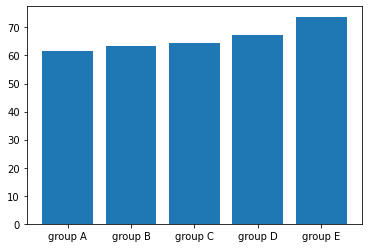

In [30]:
import matplotlib.pyplot as plt

df_plot = df_pivot.reset_index()
plt.bar(df_plot['race/ethnicity'], df_plot['math score'])
plt.show()

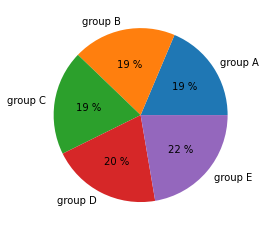

In [31]:
plt.pie(df_plot['math score'], labels=df_plot['race/ethnicity'], autopct='%.0f %%')
plt.show()